In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from inversion import BBCH

In [5]:
# Load crop_gdd_thresh from the JSON file
with open('../assets/config/gdd/crop_gdd_thresh.json', 'r') as f:
    crop_gdd_thresh_loaded = json.load(f)
    print(crop_gdd_thresh_loaded)

{'133': [[90, 10], [240, 21], [380, 30], [580, 50], [680, 60], [880, 80], [980, 90]], '136': [[100, 10], [250, 21], [400, 30], [600, 50], [700, 60], [900, 80], [1000, 90]], '146': [[100, 10], [250, 21], [400, 30], [600, 50], [700, 60], [900, 80], [1000, 90]], '147': [[50, 10], [200, 30], [550, 60], [1000, 70], [1250, 80], [1650, 90]], '153': [[80, 10], [260, 30], [450, 50], [600, 60], [750, 65], [950, 80], [1050, 89]], '157': [[80, 10], [260, 30], [450, 50], [600, 60], [750, 65], [950, 80], [1050, 89]], '158': [[60, 10], [220, 30], [450, 50], [600, 60], [800, 70], [1000, 80], [1150, 90]], '167': [[60, 10], [220, 30], [450, 50], [600, 60], [800, 70], [1000, 80], [1150, 90]]}


In [6]:
# Load lc_base_temp from the JSON file
with open('../assets/config/gdd/lc_base_temp.json', 'r') as f:
    lc_base_temp_loaded = json.load(f)
    print(lc_base_temp_loaded)

{'133': 5, '136': 5, '146': 5, '147': 10, '153': 5, '157': 8, '158': 10, '167': 10}


In [7]:
workspace_dir = '../assets'
risma_dir = 'inputs/RISMA_CSV_SSM_SST_AirT_2015_2023'
s1_dir = 'inputs/GEE_Exports_S1_RISMA_with_data_20m'

pheno = BBCH(workspace_dir=workspace_dir, risma_dir=risma_dir, s1_dir=s1_dir, crop_gdd_thresholds=crop_gdd_thresh_loaded)


Processing file: RISMA_MB11_avg_2015_2023.csv
Processing file: RISMA_MB8_avg_2015_2023.csv
Processing file: RISMA_MB6_avg_2015_2023.csv
Processing file: RISMA_MB9_avg_2015_2023.csv
Processing file: RISMA_MB13_avg_2015_2023.csv
Processing file: RISMA_MB10_avg_2015_2023.csv
Processing file: RISMA_MB5_avg_2015_2023.csv
Processing file: RISMA_MB1_avg_2015_2023.csv
Processing file: RISMA_MB7_avg_2015_2023.csv
Processing file: RISMA_MB4_avg_2015_2023.csv
Processing file: RISMA_MB3_avg_2015_2023.csv
Processing file: RISMA_MB2_avg_2015_2023.csv
Processing file: RISMA_MB12_avg_2015_2023.csv


/home/morteza/usask/inversion/src/inversion/risma.py:80: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_RISMA.groupby(['date', 'station', 'depth', 'op']).apply(lambda x: x)


Processing file: RISMA_MB1_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB13_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB9_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB8_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB6_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB11_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB12_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB15_2010_to_2024_buffer20m.csv
Processing file: RISMA_MB10_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()
/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band')

Processing file: RISMA_MB3_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB14_2010_to_2024_buffer20m.csv
Processing file: RISMA_MB4_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()
/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band')

Processing file: RISMA_MB7_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB2_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()


Processing file: RISMA_MB5_2010_to_2024_buffer20m.csv


/home/morteza/usask/inversion/src/inversion/radar.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gp_df = df_t.groupby(['op', 'year', 'doy']).apply(lambda x: x.set_index('band').drop(['op', 'year', 'doy'], axis=1).T).reset_index()
/home/morteza/usask/inversion/src/inversion/radar.py:198: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_S1_cat_gp = df_S1_cat.groupby(['year', 'doy', 'op', 'station'], group_keys=F

In [8]:
df = pheno.run(lc_base_temp=lc_base_temp_loaded)
print(df.shape)
df.head()

(4652, 29)


/home/morteza/usask/inversion/src/inversion/pheno.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['SST'].interpolate(inplace=True)
/home/morteza/usask/inversion/src/inversion/pheno.py:41: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warn

,date,station,depth,op,mean_sst,mean_airt,SSM,SST,year,doy,...,VH,VV,angle,lc,BASE_TEMP,cum_GDD_air,cum_GDD_soil,cum_GDD,BBCH,cum_SSM
0,2015-04-25,MB1,0 to 5 cm,0,10.166667,7.8365,0.131444,14.981481,2015,115,...,-20.0,-13.0,40.0,146,5,2.8365,5.166667,4.001583,0.0,0.131444
1,2015-04-25,MB10,0 to 5 cm,0,7.516667,7.8385,0.432889,12.637037,2015,115,...,-27.0,-20.0,43.0,146,5,5.6750,7.683333,6.679167,0.0,0.564333
2,2015-04-25,MB11,0 to 5 cm,0,8.616667,8.3805,0.273259,12.581481,2015,115,...,-22.0,-14.0,42.0,158,10,5.6750,7.683333,6.679167,0.0,0.837593
3,2015-04-25,MB12,0 to 5 cm,0,5.350000,8.0125,0.311259,14.271247,2015,115,...,-22.0,-12.0,42.0,146,5,8.6875,8.033333,8.360417,0.0,1.148852
4,2015-04-25,MB2,0 to 5 cm,0,13.270938,8.3070,0.340557,15.961012,2015,115,...,-19.0,-9.0,40.0,146,5,11.9945,16.304271,14.149386,0.0,1.489409


In [9]:
# save the DataFrame to a CSV file
df.to_csv('../assets/outputs/bbch_df.csv', index=False)

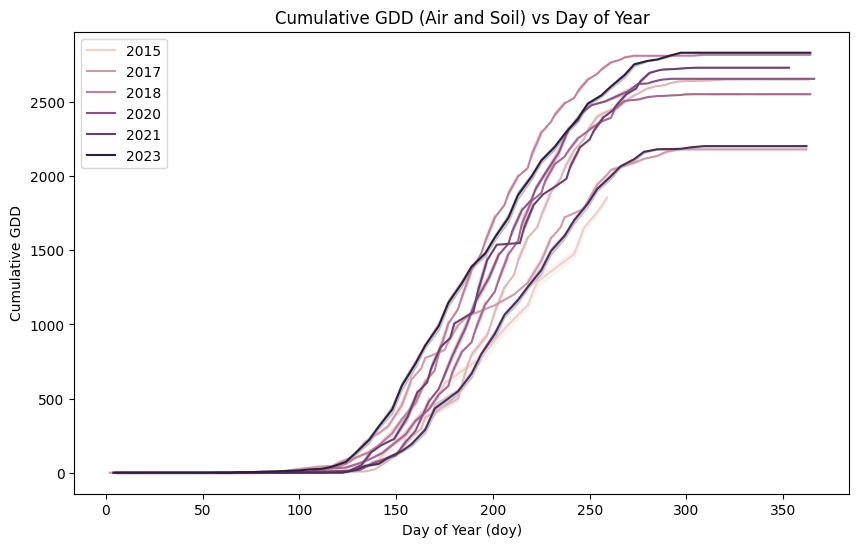

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='cum_GDD', data=df, hue='year')
plt.xlabel('Day of Year (doy)')
plt.ylabel('Cumulative GDD')
plt.title('Cumulative GDD (Air and Soil) vs Day of Year')
plt.legend()
plt.show()

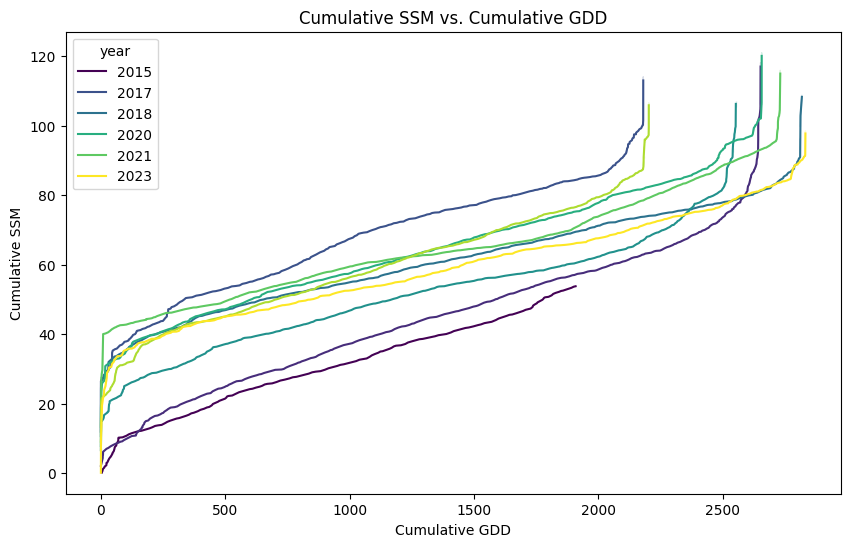

In [11]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='cum_GDD', y='cum_SSM', hue='year', data=df, palette='viridis')  # Use 'year' for color
plt.xlabel('Cumulative GDD')
plt.ylabel('Cumulative SSM')
plt.title('Cumulative SSM vs. Cumulative GDD')
plt.show()

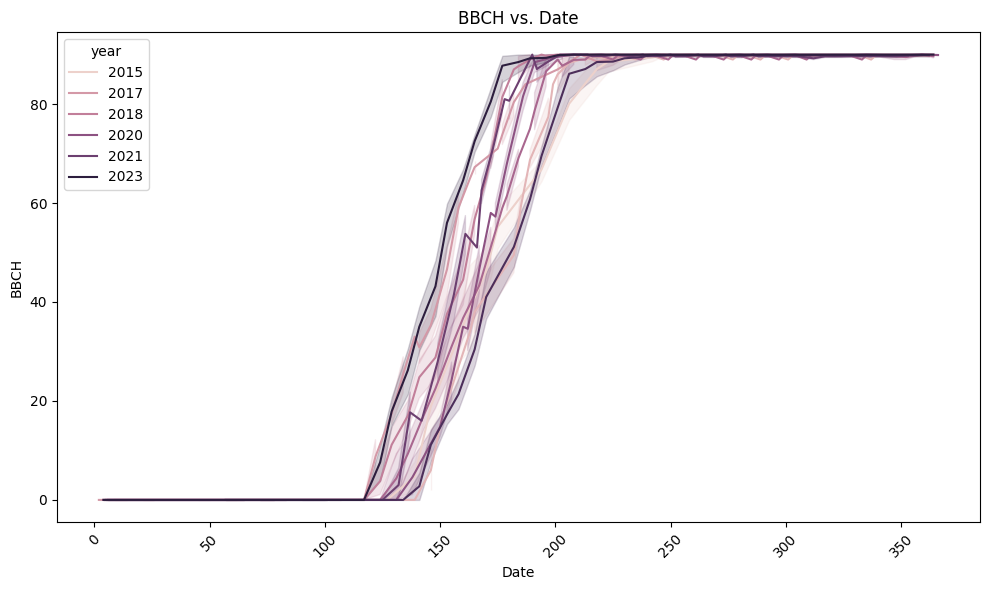

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='BBCH', data=df, hue='year')
plt.xlabel('Date')
plt.ylabel('BBCH')
plt.title('BBCH vs. Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()